## 1. Import the necessary libraries


In [2]:
%matplotlib inline
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
import plotly.express as px
import plotly.graph_objects as go

- Matplotlib: Matplotlib is one of the oldest and most flexible plotting libraries for Python. First released in 2003, it provides a MATLAB-like interface and is the foundation for many other Python visualization libraries.

- Seaborn: Seaborn is built on top of Matplotlib and provides a higher-level interface. Seaborn specializes in statistical visualizations and has built-in themes for more attractive plots.

- Pandas: Pandas has its own plotting functionality, which is a wrapper around Matplotlib. Pandas' plotting functions are convenient for quick visualizations directly from DataFrames.

- Plotly: Plotly is a modern, interactive plotting library that works in both Python and JavaScript. It creates web-based visualizations that are highly interactive and can be easily shared online. It supports a wide range of chart types, including 3D plots and animations.

- Bokeh: Bokeh is a Python library for creating interactive visualizations for modern web browsers. It's designed for presenting large datasets and streaming data. Bokeh can create standalone web applications or be embedded in Jupyter notebooks.

- ggplot: ggplot is originally an R library, part of the tidyverse ecosystem.
There's a Python port called plotnine that implements the grammar of graphics in Python. ggplot is based on the idea of building plots layer by layer, which provides a consistent and powerful approach to data visualization. It's particularly good for creating complex, multi-layered statistical graphics.

## Load Data

In [3]:
#create a folder with all the data files there and get the path to that folder
my_drive_path = "/content/drive/MyDrive/SUNY/Class Material/2024 Fall/MSA550A/Python Class Work/msa550-code-files/data/"

In [4]:
housing_df = pd.read_csv(my_drive_path+'BostonHousing.csv')

#in this data we can have different tasks:
#1. predicting the median value of a home in a tract (medv)
#2. classifying the binary var cat.medv as 1 or 0 indicating whether the home price is over or below 30k

housing_df.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  CAT. MEDV  
0   4.98  24.0          0  
1   9.14  21.6          0  
2   4.03  34.7          1  
3   2.94  33.4          1  
4   5.33  36.2          1

In [5]:
amtrak_df = pd.read_csv(my_drive_path + 'Amtrak.csv')
#we can focus on predicting the monthly ridership

amtrak_df.head(5)

Month  Ridership
0  01/01/1991   1708.917
1  01/02/1991   1620.586
2  01/03/1991   1972.715
3  01/04/1991   1811.665
4  01/05/1991   1974.964

In [6]:
#notice that the Month column is of type object
amtrak_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      159 non-null    object 
 1   Ridership  159 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [7]:
#This line is converting the 'Month' column to datetime and creating a new 'Date' column.
amtrak_df['Date'] = pd.to_datetime(amtrak_df.Month, format='%d/%m/%Y')
print(amtrak_df.head(5))

        Month  Ridership       Date
0  01/01/1991   1708.917 1991-01-01
1  01/02/1991   1620.586 1991-02-01
2  01/03/1991   1972.715 1991-03-01
3  01/04/1991   1811.665 1991-04-01
4  01/05/1991   1974.964 1991-05-01


In [8]:
#This creates a time series of ridership data indexed by the date.
ridership_ts = pd.Series(amtrak_df.Ridership.values, index=amtrak_df.Date)
ridership_ts

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2003-11-01    2076.054
2003-12-01    2140.677
2004-01-01    1831.508
2004-02-01    1838.006
2004-03-01    2132.446
Length: 159, dtype: float64

## Amtrak Ridership - Line Plot

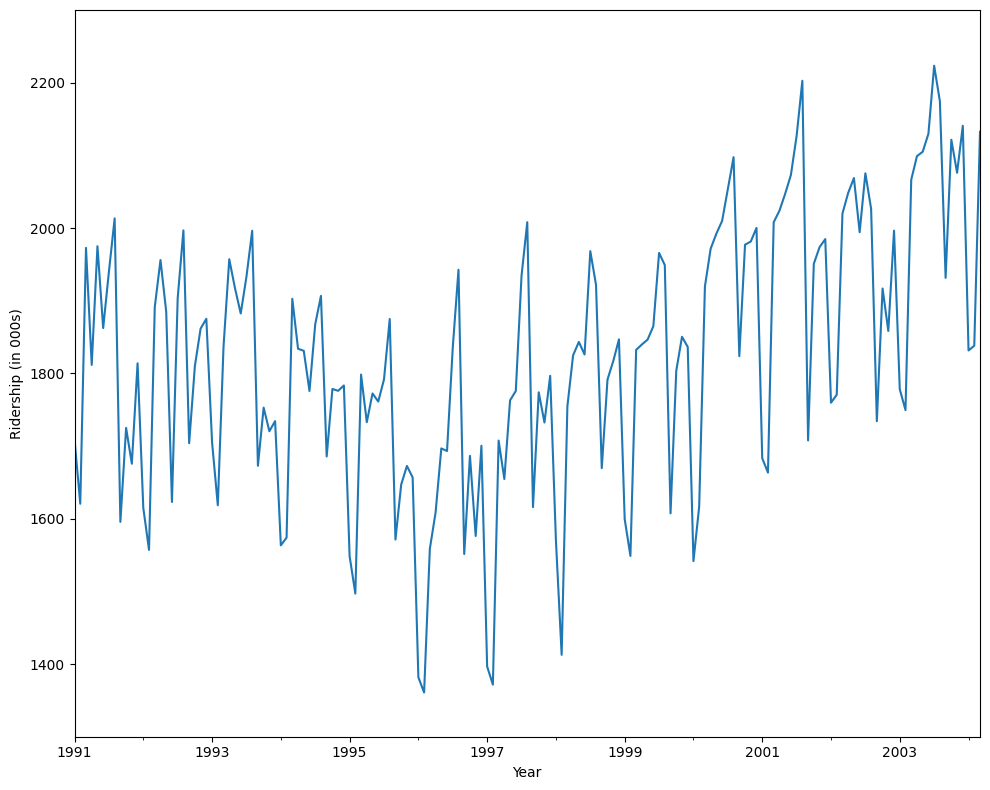

In [9]:
#line graph is useful to see the overall lever over time

#Using pandas for a line Graph:
ridership_ts.plot(ylim=[1300, 2300], legend=False, figsize=[10, 8])
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Ridership (in 000s)')

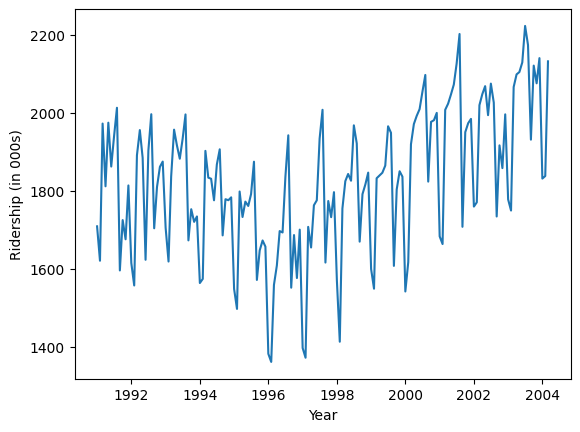

In [10]:
# alternative plot with matplotlib
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel('Year')  # set x-axis label
plt.ylabel('Ridership (in 000s)')  # set y-axis label

In [11]:
#keep in mind that ridership_ts is not a dataframe - so the index is the date and the values are riders
fig = px.line(x=ridership_ts.index, y=ridership_ts.values,
              labels={'x': 'Year', 'y': 'Ridership (in 000s)'},
              title='Ridership Over Time')

fig.update_layout(yaxis_range=[1300, 2300])  # Set y-axis range

fig.show()

## Boston Housing - Scatter Plot

<Axes: xlabel='LSTAT', ylabel='MEDV'>

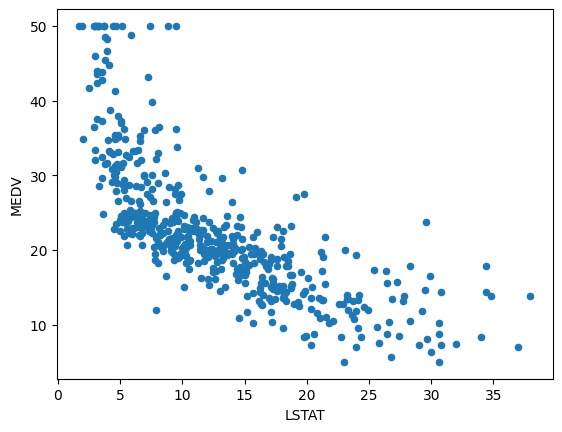

In [12]:
#scatter plot is useful in looking at relationship between two numerical variables

#using pandas
# rename CAT. MEDV column for easier data handling
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)

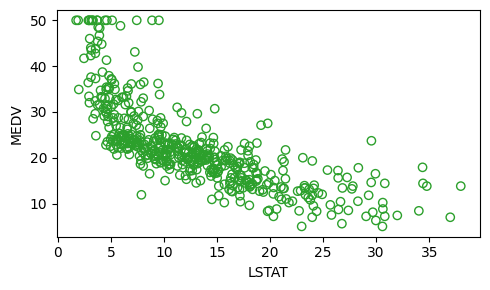

In [13]:

#using matplotlib
# Set the color of the points in the scatterplot and draw as open circles.
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(housing_df.LSTAT, housing_df.MEDV, color='C2', facecolor='none')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.tight_layout()
plt.show()

In [14]:
fig = px.scatter(housing_df, x='LSTAT', y='MEDV',
                 color_discrete_sequence=['red'],
                 title='Scatter Plot of LSTAT vs. MEDV')

fig.update_traces(marker=dict(size=5, symbol='circle-open'))

fig.update_layout(
    xaxis_title='LSTAT',
    yaxis_title='MEDV'
)

fig.show()

In [15]:
# Print some statistics

correlation = housing_df['LSTAT'].corr(housing_df['MEDV'])

print(f"Correlation between LSTAT and MEDV: {correlation:.2f}")
print(f"Mean LSTAT: {housing_df['LSTAT'].mean():.2f}")
print(f"Mean MEDV: {housing_df['MEDV'].mean():.2f}")

Correlation between LSTAT and MEDV: -0.74
Mean LSTAT: 12.65
Mean MEDV: 22.53


- Negative Correlation: There's a strong negative correlation between LSTAT (% lower status of the population) and MEDV (median home value). This suggests that areas with a higher percentage of lower status population tend to have lower median home values.

- Non-linear Relationship: The scatter plot shows a non-linear relationship. The trend isn't perfectly linear, suggesting that the relationship between LSTAT and MEDV might be more complex than a simple linear correlation.

- Outliers: Look for any points that are far from the main cluster. These could represent unique neighborhoods or data anomalies worth investigating.

- Clustering: There seems to be a cluster of homes with high MEDV and low LSTAT. These might represent more affluent neighborhoods.

- Variability: The spread of MEDV values seems to decrease as LSTAT increases, suggesting that there's less variability in home prices in areas with a higher percentage of lower status population.

## Boston Housing - Bar Chart (Categorical Values)

In [16]:
housing_df.groupby('CHAS').mean()

CRIM         ZN      INDUS       NOX        RM        AGE       DIS  \
CHAS                                                                            
0     3.744447  11.634820  11.019193  0.551817  6.267174  67.911677  3.851915   
1     1.851670   7.714286  12.719143  0.593426  6.519600  77.500000  3.029709   

           RAD         TAX    PTRATIO      LSTAT       MEDV  CAT_MEDV  
CHAS                                                                   
0     9.566879  409.870488  18.527176  12.757941  22.093843  0.154989  
1     9.314286  386.257143  17.491429  11.241714  28.440000  0.314286

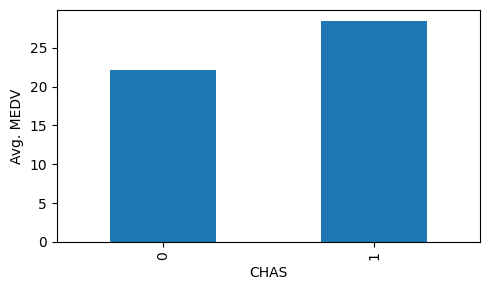

In [17]:
#using pandas
ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Avg. MEDV')

plt.tight_layout()
plt.show()

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64


Text(0, 0.5, 'Avg. MEDV')

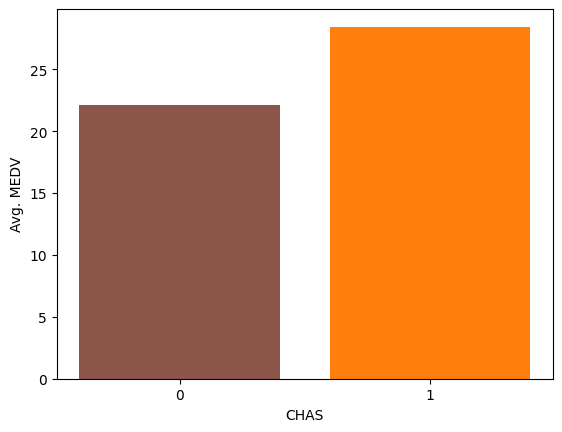

In [18]:
#using matplotlib
dataForPlot = housing_df.groupby('CHAS').mean().MEDV
print(dataForPlot)
fig, ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5', 'C1'])
#ax.set_xticks([0, 1], False)
ax.set_xticks([0,1], minor=False)
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')

In [19]:


dataForPlot = housing_df.groupby('CHAS').mean().MEDV

fig = go.Figure()
fig.add_trace(go.Bar(
    x=dataForPlot.index,
    y=dataForPlot,
    marker_color=['lightskyblue', 'mistyrose'],
))

fig.update_layout(
    xaxis_title='CHAS',
    yaxis_title='Avg. MEDV',
    xaxis=dict(
        tickvals=[0, 1],  # Set the tick values for x-axis
        tickmode='array',  # Specify tick mode as an array
    )
)

fig.show()


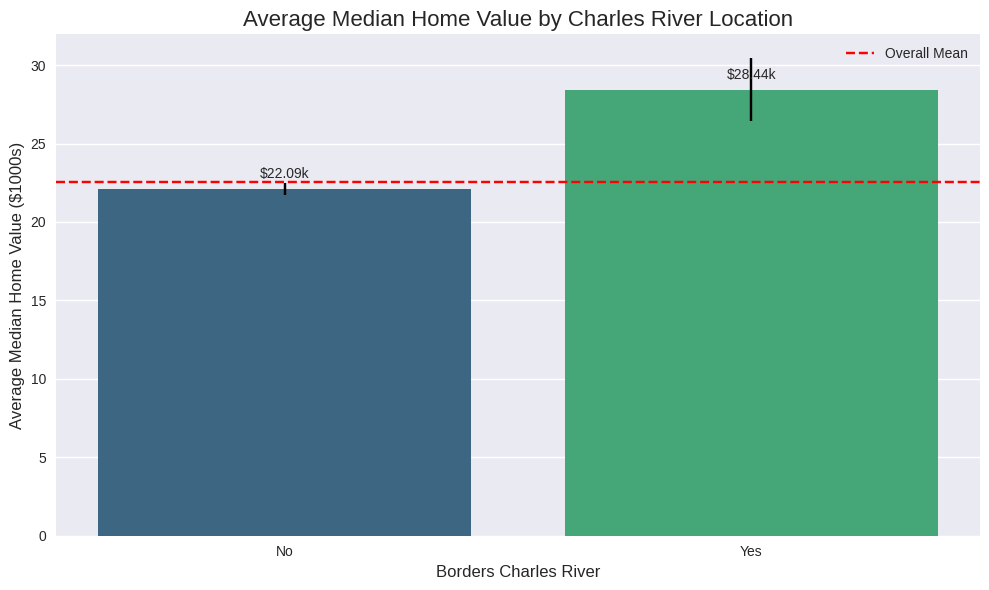

Overall mean MEDV: $22.53k
Mean MEDV (Not bordering Charles River): $22.09k
Mean MEDV (Bordering Charles River): $28.44k
Difference: $6.35k

t-statistic: -3.9964
p-value: 0.0001


In [20]:
#bar chart is useful to see differences between subgroups

#Bar Chart for Categorical Variable
#Average median neighborhood value for neighborhoods that do and do not border the Charles River

# Set the style for better-looking plots
plt.style.use('seaborn-v0_8')  # Use the updated style name

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the mean MEDV for each CHAS category
mean_medv = housing_df.groupby('CHAS')['MEDV'].mean()

# Create the bar plot
sns.barplot(x=mean_medv.index, y=mean_medv.values, ax=ax, hue=mean_medv.index, palette='viridis', legend=False)

# Customize the plot
ax.set_title('Average Median Home Value by Charles River Location', fontsize=16)
ax.set_xlabel('Borders Charles River', fontsize=12)
ax.set_ylabel('Average Median Home Value ($1000s)', fontsize=12)
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])

# Add value labels on top of each bar
for i, v in enumerate(mean_medv.values):
    ax.text(i, v + 0.5, f'${v:.2f}k', ha='center', va='bottom')

# Add a horizontal line for the overall mean
overall_mean = housing_df['MEDV'].mean()
ax.axhline(y=overall_mean, color='r', linestyle='--', label='Overall Mean')

# Add error bars (standard error of the mean)
sem = housing_df.groupby('CHAS')['MEDV'].sem()
ax.errorbar(x=mean_medv.index, y=mean_medv.values, yerr=sem, fmt='none', c='black', capsize=5)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Overall mean MEDV: ${overall_mean:.2f}k")
print(f"Mean MEDV (Not bordering Charles River): ${mean_medv[0]:.2f}k")
print(f"Mean MEDV (Bordering Charles River): ${mean_medv[1]:.2f}k")
print(f"Difference: ${mean_medv[1] - mean_medv[0]:.2f}k")

# Perform t-test to check if the difference is statistically significant
from scipy import stats

not_charles = housing_df[housing_df['CHAS'] == 0]['MEDV']
charles = housing_df[housing_df['CHAS'] == 1]['MEDV']
t_stat, p_value = stats.ttest_ind(not_charles, charles)

print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Average Home Values:
- Overall mean MEDV (Median Value of Owner-Occupied Homes): 22.53K
- Mean MEDV for homes not bordering Charles River: 22.09K
- Mean MEDV for homes bordering Charles River: 28.44K


Charles River Effect:
- Homes bordering the Charles River have a higher average value (28.44K) compared to those that don't (22.09K).
- The difference is 6.35k, which is substantial – about 28.7% higher than the non-riverside properties.



Statistical Significance:
- The t-statistic is -3.9964, which indicates a large difference between the two groups.
T- he p-value is 0.0001, which is much less than the conventional significance level of 0.05.
- This extremely low p-value suggests that the difference in home values between properties bordering and not bordering the Charles River is statistically significant and very unlikely to have occurred by chance.


Insights and Implications:

- Riverside Premium: There's a clear "riverside premium" in the Boston housing market. Properties bordering the Charles River command significantly higher values on average.

- Magnitude of Effect: The $6.35k difference represents a substantial increase in property value. This could be due to factors such as better views, recreational opportunities, or the prestige associated with riverside locations.

- Market Dynamics: This information could be valuable for real estate professionals, homebuyers, and sellers in understanding price differentials in the Boston area.

- Urban Planning: City planners and policymakers might use this information when considering development projects or conservation efforts along the Charles River, recognizing the added value that riverside properties bring to the city's tax base.

- Investment Potential: Investors in real estate might see properties near the Charles River as potentially more valuable investments, given the significant price premium.

- Further Research Opportunities: While we've established a strong correlation between Charles River proximity and higher home values, it would be worthwhile to investigate other factors that might be contributing to this difference (e.g., are riverside properties also in neighborhoods with better schools or lower crime rates?).

- Limitations: Remember that this data represents a snapshot in time. The housing market can change, and the premium for riverside properties could fluctuate based on various economic and environmental factors.

## Boston Housing - Distribution Plot

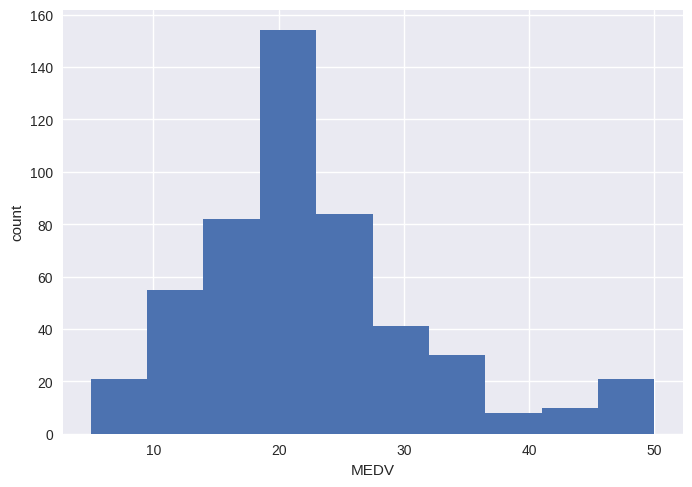

In [21]:
ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV')
ax.set_ylabel('count')

plt.show()

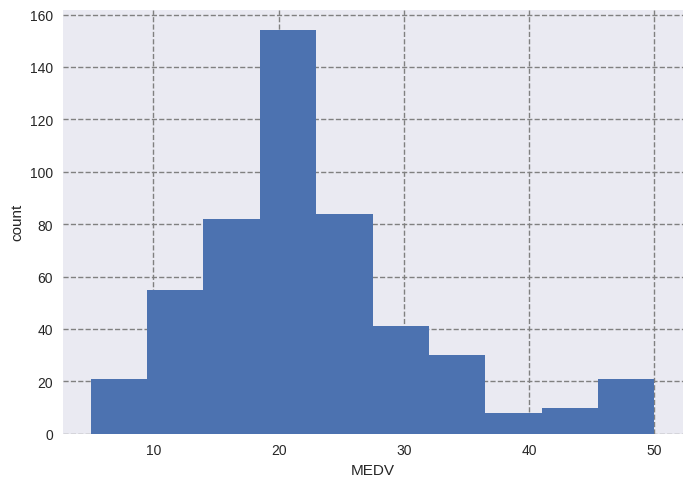

In [22]:
fig, ax = plt.subplots()
ax.hist(housing_df.MEDV)
ax.set_axisbelow(True)  # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
ax.set_xlabel('MEDV')
ax.set_ylabel('count')
plt.show()

In [23]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=housing_df['MEDV'],
    marker_color='blue',  # Set the color of the bars
    opacity=0.7,  # Set the opacity of the bars
))

fig.update_layout(
    xaxis_title='MEDV',
    yaxis_title='Count',
    xaxis=dict(
        showgrid=True,  # Show the grid lines
        gridcolor='lightpink',  # Set the grid color
        gridwidth=1,  # Set the grid line width
    ),
)

fig.show()

In [24]:
print(f"Mean MEDV: ${housing_df['MEDV'].mean():.2f}k")
print(f"Median MEDV: ${housing_df['MEDV'].median():.2f}k")
print(f"Standard Deviation of MEDV: ${housing_df['MEDV'].std():.2f}k")
print(f"Minimum MEDV: ${housing_df['MEDV'].min():.2f}k")
print(f"Maximum MEDV: ${housing_df['MEDV'].max():.2f}k")

Mean MEDV: $22.53k
Median MEDV: $21.20k
Standard Deviation of MEDV: $9.20k
Minimum MEDV: $5.00k
Maximum MEDV: $50.00k


Some Insights

- Market Diversity: The wide range (5.00k to 50.00k) suggests a diverse housing market in Boston, catering to various income levels and preferences.

- Positive Skew: The mean being higher than the median indicates a positively skewed distribution. This is common in housing markets, where there's often a "long tail" of high-value properties.

- Luxury Segment: The maximum value of 50.00k, which is more than twice the mean, suggests the presence of a luxury housing segment in Boston.

- Affordable Housing: The minimum value of 5.00k, which is less than a quarter of the mean, indicates the existence of more affordable housing options.

- Further Analysis: It would be valuable to investigate how other factors in the dataset (like crime rate, accessibility to highways, etc.) correlate with these home values to understand what drives prices in different segments of the market.



## Boston Housing - Box Plots

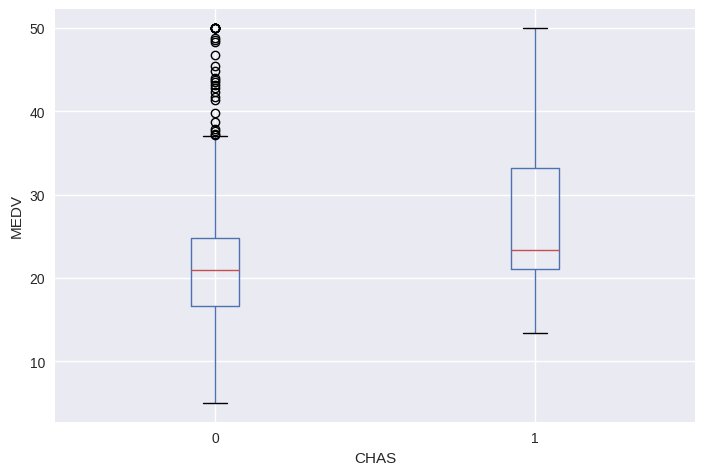

In [25]:
#typically we draw box plots on Y-axis, but it can also be turned on x

#horizontal line is the 50th percentile
#box covers 50% of the data
#top of the box represents the 75th percentile
#botton of the box represents the 25th percentile
#it can help as assess the skewness of data


ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')
plt.suptitle('')  # Suppress the titles
plt.title('')

plt.show()

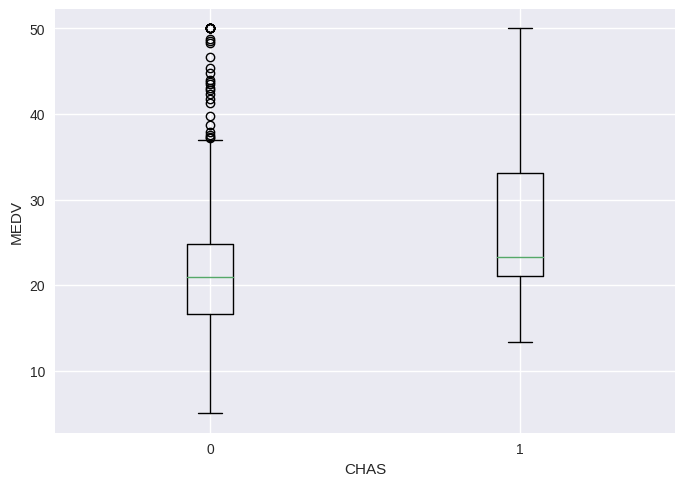

In [26]:
dataForPlot = [list(housing_df[housing_df.CHAS==0].MEDV), list(housing_df[housing_df.CHAS==1].MEDV)]
fig, ax = plt.subplots()
ax.boxplot(dataForPlot)
ax.set_xticks([1, 2], minor=False)
ax.set_xticklabels([0, 1])
ax.set_xlabel('CHAS')
ax.set_ylabel('MEDV')
plt.show()

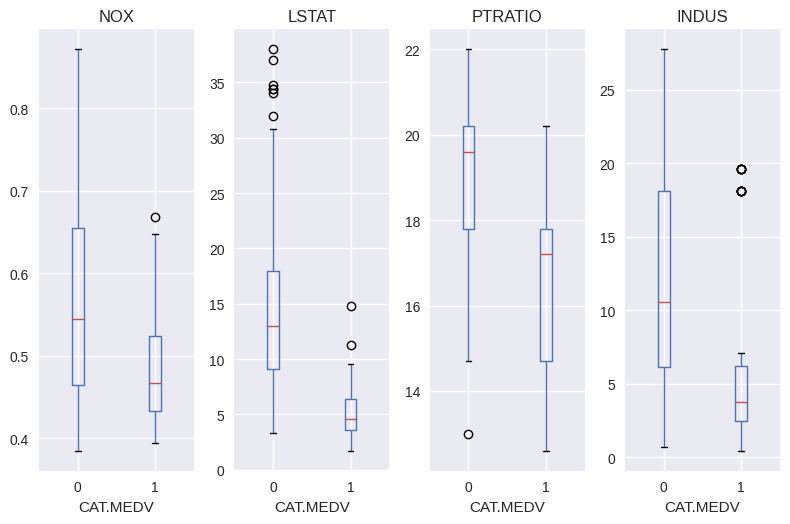

In [27]:
#Side by side boxplots
fig, axes = plt.subplots(nrows=1, ncols=4)
housing_df.boxplot(column='NOX', by='CAT_MEDV', ax=axes[0])
housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=axes[1])
housing_df.boxplot(column='PTRATIO', by='CAT_MEDV', ax=axes[2])
housing_df.boxplot(column='INDUS', by='CAT_MEDV', ax=axes[3])
for ax in axes:
    ax.set_xlabel('CAT.MEDV')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

In [28]:
import plotly.subplots as sp

# Create subplots with 1 row and 4 columns
fig = sp.make_subplots(rows=1, cols=4, subplot_titles=['NOX', 'LSTAT', 'PTRATIO', 'INDUS'])

# Define the categories for CAT_MEDV
categories = housing_df['CAT_MEDV'].unique()

# Loop through the columns and create box plots
for i, column in enumerate(['NOX', 'LSTAT', 'PTRATIO', 'INDUS']):
    for category in categories:
        data = housing_df[housing_df['CAT_MEDV'] == category][column]
        trace = go.Box(
            x=[category] * len(data),
            y=data
        )
        fig.add_trace(trace, row=1, col=i + 1)

# Update the x-axis labels and layout
x_axis_labels = {'NOX': 'NOX', 'LSTAT': 'LSTAT', 'PTRATIO': 'PTRATIO', 'INDUS': 'INDUS'}
#fig.update_xaxes(title_text='CAT.MEDV', tickvals=categories, ticktext=[x_axis_labels[column] for column in ['NOX', 'LSTAT', 'PTRATIO', 'INDUS']], row=1, col=1)
#fig.update_xaxes(title_text='CAT.MEDV', showticklabels=False, row=1, col=2)
#fig.update_xaxes(title_text='CAT.MEDV', showticklabels=False, row=1, col=3)
#fig.update_xaxes(title_text='CAT.MEDV', showticklabels=False, row=1, col=4)

fig.update_yaxes(title_text='Values', row=1, col=1)
fig.update_xaxes(title_text='CAT.MEDV', row=1, col= 1)
fig.update_xaxes(title_text='CAT.MEDV', row=1, col= 2)
fig.update_xaxes(title_text='CAT.MEDV', row=1, col= 3)
fig.update_xaxes(title_text='CAT.MEDV', row=1, col= 4)

# Update the subplot titles
fig.update_layout(
    title='Side by Side Boxplots',
    showlegend=False
)

# Show the plot
fig.show()


MEDV by CHAS (Charles River dummy variable):
- Properties near Charles River (CHAS=1) have a higher mean value (28.44) compared to those not near the river (22.09).
- There's more variability in prices for riverside properties (std dev of 11.82 vs 8.83).
- Both groups have the same maximum value of 50.0, which might indicate a ceiling effect in the data.

Outliers in MEDV:

- There are 40 outliers in MEDV.
- Most outliers are on the high end (37.0 to 50.0), with only two low outliers at 5.0.

- The presence of multiple 50.0 values suggests a possible truncation of data at this upper limit.

NOX (Nitric Oxides Concentration) by CAT. MEDV:
- Lower value homes (CAT. MEDV = 0) have higher NOX levels (mean 0.567) compared to higher value homes (mean 0.494).
- There are no outliers in NOX, suggesting a relatively consistent distribution.


LSTAT (% lower status of the population) by CAT. MEDV:
- There's a strong negative relationship: lower value homes have much higher LSTAT (mean 14.15) compared to higher value homes (mean 5.14).
- There are 7 outliers, all on the high end (31.99 to 37.97), indicating some areas with exceptionally high percentages of lower status population.

PTRATIO (Pupil-teacher ratio) by CAT. MEDV:
- Lower value homes have higher pupil-teacher ratios (mean 18.88) compared to higher value homes (mean 16.31).
- There are 15 outliers, all on the low end (12.6 to 13.0), suggesting some areas with exceptionally good pupil-teacher ratios.


INDUS (Proportion of non-retail business acres) by CAT. MEDV:
- Lower value homes are in areas with higher proportions of non-retail business (mean 12.26) compared to higher value homes (mean 5.51).
- There are no outliers in INDUS.


Correlation Matrix:
- MEDV has strong negative correlations with LSTAT (-0.738) and moderate negative correlations with PTRATIO (-0.508), INDUS (-0.484), and NOX (-0.427).
- NOX and INDUS have a strong positive correlation (0.764), suggesting industrial areas have higher nitric oxide levels.
- LSTAT has moderate to strong positive correlations with NOX (0.591) and INDUS (0.604).

Insights:
- Charles River proximity is associated with higher home values, but also with more price variability (we noticed that earlier).
- Environmental factors (NOX) have a clear relationship with home values, with lower pollution associated with higher values.

- Socioeconomic status (LSTAT) has the strongest relationship with home values, indicating that neighborhood demographics are a key factor in housing prices.

- Education quality (as measured by PTRATIO) shows a clear relationship with home values, with lower ratios (potentially indicating better schools) associated with higher home values.

- Industrial presence (INDUS) is negatively associated with home values, suggesting a preference for residential or mixed-use areas.

- The strong correlations between NOX, INDUS, and LSTAT suggest that industrial areas tend to have higher pollution and lower socioeconomic status.

- The presence of outliers, particularly in MEDV and LSTAT, indicates some extreme cases that might warrant further investigation.

## Boston Housing - Heat Map

In [29]:
housing_df.corr()


CRIM        ZN     INDUS      CHAS       NOX        RM  \
CRIM      1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247   
ZN       -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991   
INDUS     0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676   
CHAS     -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251   
NOX       0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188   
RM       -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000   
AGE       0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265   
DIS      -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246   
RAD       0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847   
TAX       0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048   
PTRATIO   0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501   
LSTAT     0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808   
MEDV     -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360   
CAT_MEDV -0.151987  0.365296 -0.366276  0.108631 -0.232502  0.641265   

               AGE       DIS       RAD       TAX   PTRATIO     LSTAT  \
CRIM      0.352734 -0.379670  0.625505  0.582764  0.289946  0.455621   
ZN       -0.569537  0.664408 -0.311948 -0.314563 -0.391679 -0.412995   
INDUS     0.644779 -0.708027  0.595129  0.720760  0.383248  0.603800   
CHAS      0.086518 -0.099176 -0.007368 -0.035587 -0.121515 -0.053929   
NOX       0.731470 -0.769230  0.611441  0.668023  0.188933  0.590879   
RM       -0.240265  0.205246 -0.209847 -0.292048 -0.355501 -0.613808   
AGE       1.000000 -0.747881  0.456022  0.506456  0.261515  0.602339   
DIS      -0.747881  1.000000 -0.494588 -0.534432 -0.232471 -0.496996   
RAD       0.456022 -0.494588  1.000000  0.910228  0.464741  0.488676   
TAX       0.506456 -0.534432  0.910228  1.000000  0.460853  0.543993   
PTRATIO   0.261515 -0.232471  0.464741  0.460853  1.000000  0.374044   
LSTAT     0.602339 -0.496996  0.488676  0.543993  0.374044  1.000000   
MEDV     -0.376955  0.249929 -0.381626 -0.468536 -0.507787 -0.737663   
CAT_MEDV -0.191196  0.118887 -0.197924 -0.273687 -0.443425 -0.469911   

              MEDV  CAT_MEDV  
CRIM     -0.388305 -0.151987  
ZN        0.360445  0.365296  
INDUS    -0.483725 -0.366276  
CHAS      0.175260  0.108631  
NOX      -0.427321 -0.232502  
RM        0.695360  0.641265  
AGE      -0.376955 -0.191196  
DIS       0.249929  0.118887  
RAD      -0.381626 -0.197924  
TAX      -0.468536 -0.273687  
PTRATIO  -0.507787 -0.443425  
LSTAT    -0.737663 -0.469911  
MEDV      1.000000  0.789789  
CAT_MEDV  0.789789  1.000000

<Axes: >

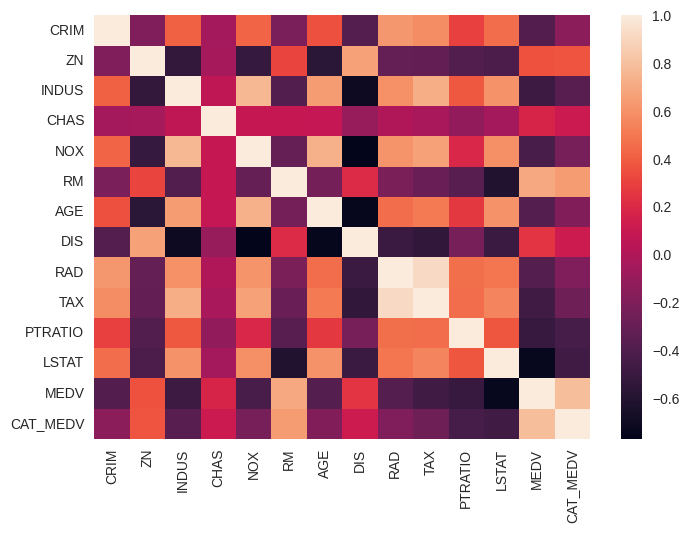

In [30]:
#heatmap uses colors to denote values (to show magnitudes)
#Typical Uses:
  # correlation tables
  # missing values

corr = housing_df.corr()
sns.heatmap(corr)

<Axes: >

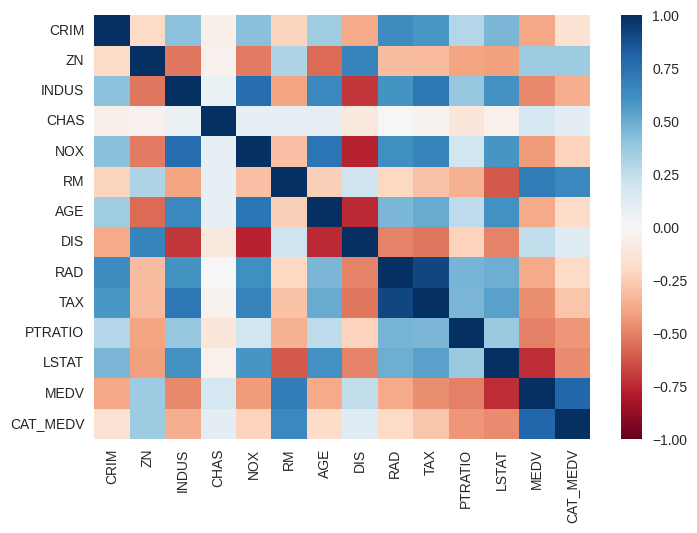

In [31]:
# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")

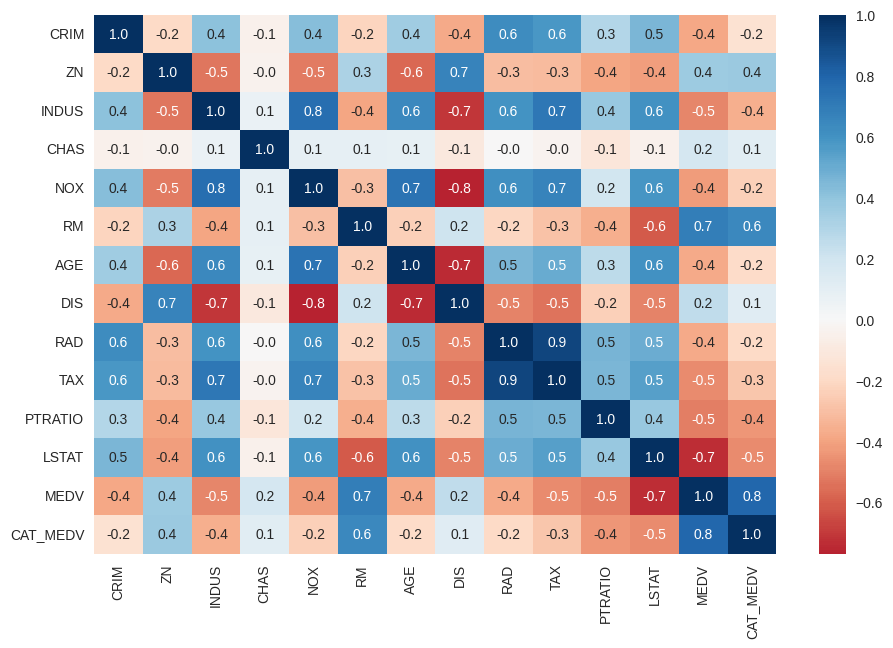

In [32]:
#Darker and bluer = stronger positive correlation
#Darker & redder = stronger negative correlation

# Include information about values
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

In [33]:
fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.index,
    colorscale='RdBu',
    colorbar=dict(title='Correlation'),
    zmin=-1,  # Set the color scale minimum to -1
    zmax=1,   # Set the color scale maximum to 1
    hoverongaps=False,
    zsmooth='best',  # Smoothing for the heatmap
    showscale=True,
    text=corr.values.round(1),  # Format values with one decimal place
))

fig.update_xaxes(side="top")  # Show x-axis labels on top
fig.update_layout(
    title=dict(text='<b>Correlation Heatmap</b>', x=0.5, font=dict(size=20)),
    xaxis=dict(tickangle=-45),
    yaxis=dict(tickangle=0),
    width=900,  # Adjust the width of the heatmap
    height=500,  # Adjust the height of the heatmap
)

fig.show()

## NYPD Motor Vehicle Collisions - Missing Data

A heatmap can also be used to visualize missing values. Here, we use a sample of the NYPD Motor Vehicle Collisions Dataset. (https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)

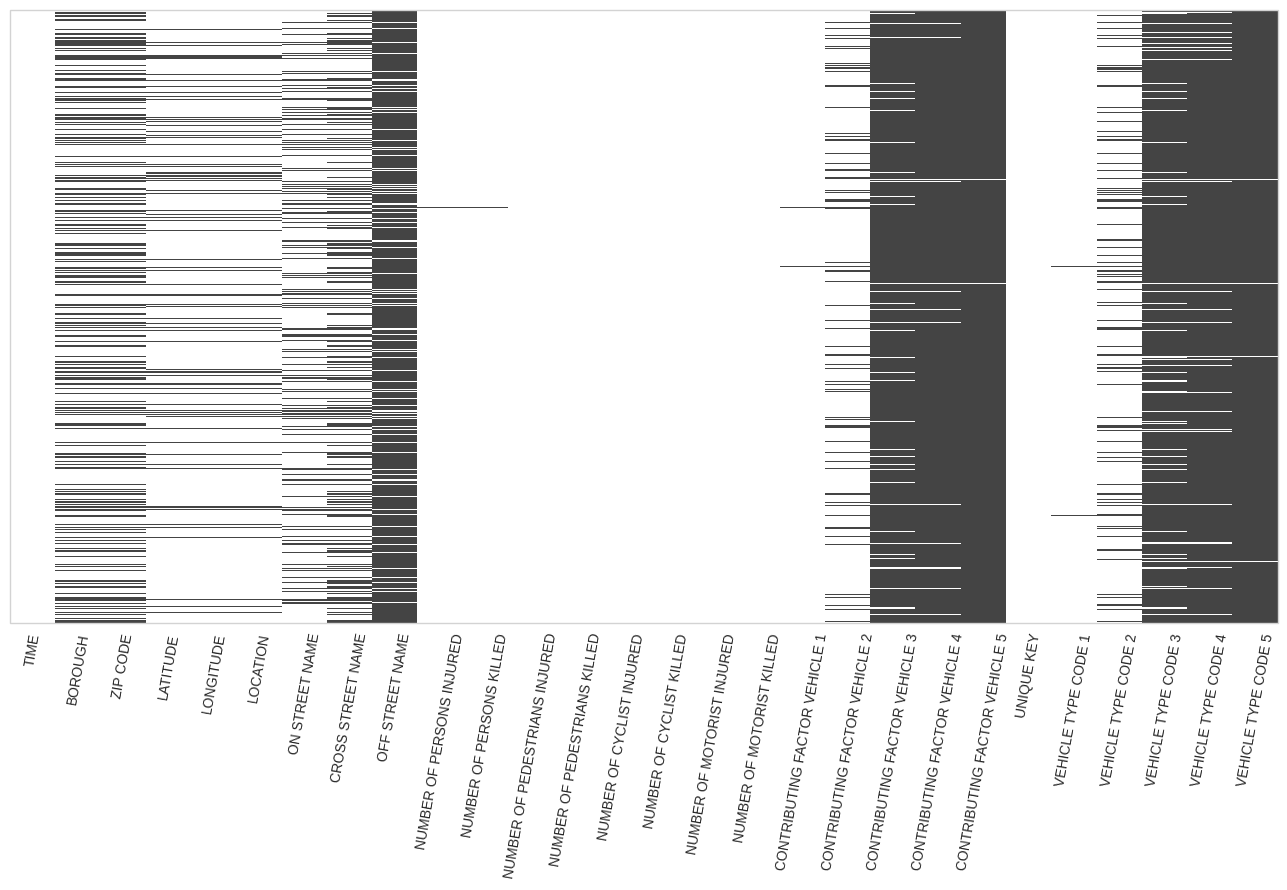

In [34]:

nypd_df = pd.read_csv(my_drive_path+'NYPD_Motor_Vehicle_Collisions_1000.csv').sort_values(['DATE'])
nypd_df = nypd_df.set_index('DATE')

# Given a dataframe df create a copy of the array that is 0 if a field contains a value
# and 1 for NaN
naInfo = np.zeros(nypd_df.shape)
naInfo[nypd_df.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=nypd_df.columns)

fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "#444444"], cbar=False, ax=ax)
ax.set_yticks([])

rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1,
                     edgecolor='lightgrey',facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)

plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

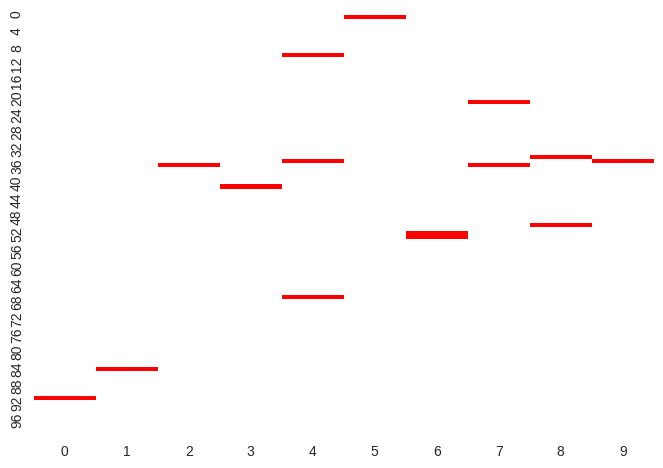

In [35]:
# Create a dataframe with missing values
np.random.seed(12345)
df = pd.DataFrame(np.random.randint(50, size=(100, 10)))
df.where(df!=max(df), np.nan, inplace=True)

# Given a dataframe df create a copy of the array that is 0 if a field contains a value and 1 for NaN
naInfo = np.zeros(df.shape)
naInfo[df.isna().values] = 1
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "red"], cbar=False)

plt.show()

In [36]:
nypd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 01/01/2014 to 12/31/2018
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TIME                           1000 non-null   object 
 1   BOROUGH                        689 non-null    object 
 2   ZIP CODE                       689 non-null    float64
 3   LATITUDE                       881 non-null    float64
 4   LONGITUDE                      881 non-null    float64
 5   LOCATION                       881 non-null    object 
 6   ON STREET NAME                 812 non-null    object 
 7   CROSS STREET NAME              672 non-null    object 
 8   OFF STREET NAME                126 non-null    object 
 9   NUMBER OF PERSONS INJURED      999 non-null    float64
 10  NUMBER OF PERSONS KILLED       999 non-null    float64
 11  NUMBER OF PEDESTRIANS INJURED  1000 non-null   int64  
 12  NUMBER OF PEDESTRIANS KILLED   1000 no

In [37]:
naInfo = nypd_df.isna().astype(int)

fig = go.Figure(data=go.Heatmap(
    z=naInfo.values,
    x=naInfo.columns,
    y=naInfo.index,
    colorscale=[[0, 'white'], [1, 'red']],  # Missing values in white, present values in dark grey
))

fig.update_layout(
    title='Missing Values Heatmap',
    xaxis=dict(tickangle=-45),
    yaxis=dict(tickangle=0),
    width=800,
    height=700,
)

# Remove the colorbar
fig.update_layout(coloraxis_showscale=False)

fig.show()

Total number of rows: 1000

Missing Data Summary:
                               Missing Values  Percentage Missing
CONTRIBUTING FACTOR VEHICLE 5             995                99.5
VEHICLE TYPE CODE 5                       993                99.3
CONTRIBUTING FACTOR VEHICLE 4             981                98.1
VEHICLE TYPE CODE 4                       960                96.0
CONTRIBUTING FACTOR VEHICLE 3             944                94.4
VEHICLE TYPE CODE 3                       915                91.5
OFF STREET NAME                           874                87.4
CROSS STREET NAME                         328                32.8
ZIP CODE                                  311                31.1
BOROUGH                                   311                31.1
ON STREET NAME                            188                18.8
VEHICLE TYPE CODE 2                       158                15.8
CONTRIBUTING FACTOR VEHICLE 2             128                12.8
LATITUDE                  

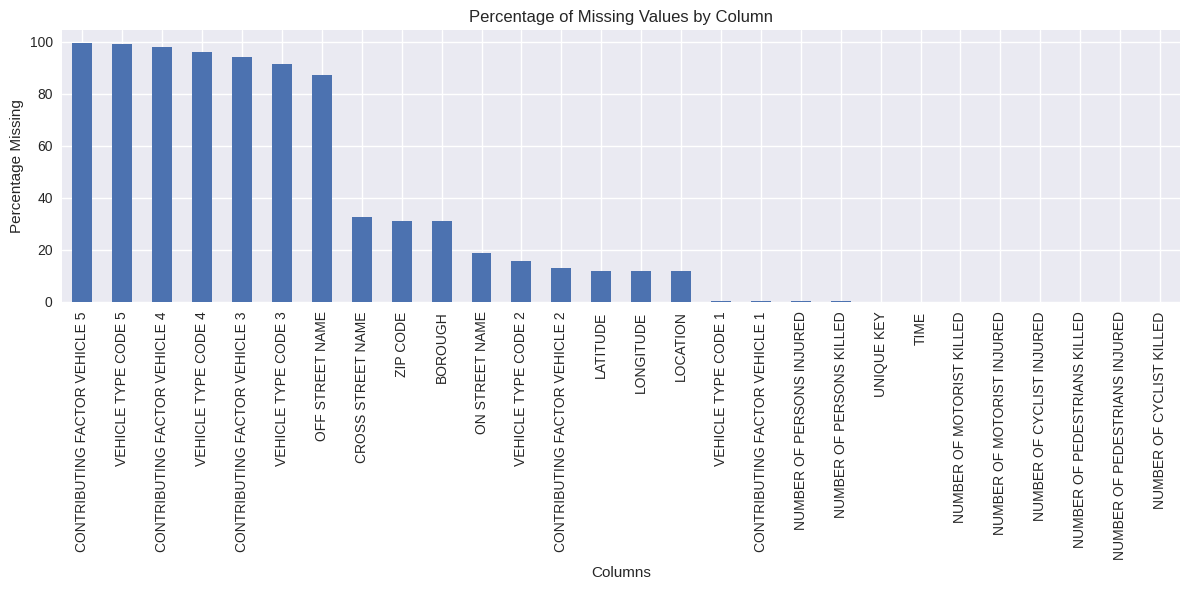

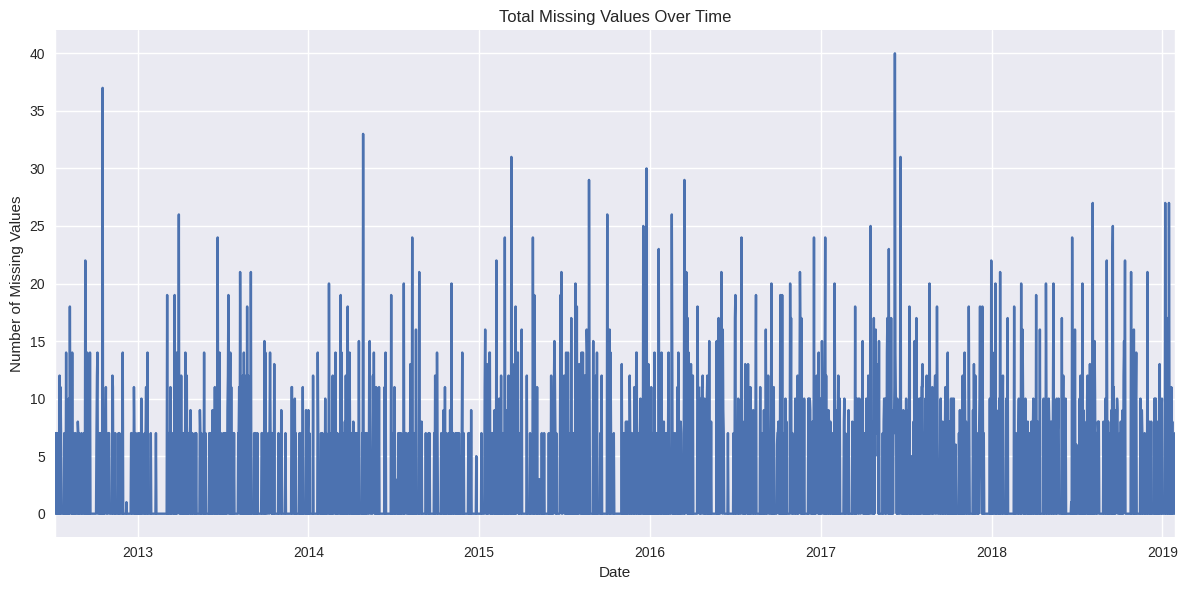

In [38]:

# Convert index to DatetimeIndex
nypd_df.index = pd.to_datetime(nypd_df.index)

# Calculate missing values
missing_values = nypd_df.isnull().sum()
missing_percentages = 100 * missing_values / len(nypd_df)

# Create a summary DataFrame
missing_table = pd.concat([missing_values, missing_percentages], axis=1, keys=['Missing Values', 'Percentage Missing'])
missing_table = missing_table.sort_values('Percentage Missing', ascending=False)

# Print summary statistics
print("Total number of rows:", len(nypd_df))
print("\nMissing Data Summary:")
print(missing_table)

# Calculate overall percentage of missing data
overall_missing_percentage = nypd_df.isnull().sum().sum() / np.product(nypd_df.shape) * 100
print(f"\nOverall percentage of missing data: {overall_missing_percentage:.2f}%")

# Identify columns with more than 50% missing data
columns_to_drop = missing_table[missing_table['Percentage Missing'] > 50].index
print("\nColumns with more than 50% missing data:")
print(columns_to_drop.tolist())

# Check for any rows that are completely empty
empty_rows = nypd_df.isnull().all(axis=1).sum()
print(f"\nNumber of completely empty rows: {empty_rows}")

# Visualize missing data
plt.figure(figsize=(12, 6))
missing_table['Percentage Missing'].plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Time series analysis of missing data
daily_missing = nypd_df.resample('D').apply(lambda x: x.isnull().sum())
plt.figure(figsize=(12, 6))
daily_missing.sum(axis=1).plot()
plt.title('Total Missing Values Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.tight_layout()
plt.show()

In [53]:

# Create a binary mask of missing values
missing_mask = nypd_df.isnull().astype(int)

fig = go.Figure(data=go.Heatmap(
    z=missing_mask.values,
    x=missing_mask.columns,
    y=missing_mask.index,
    colorscale=[[0, 'white'], [1, 'red']]
))

fig.update_layout(
    title='Missing Values Heatmap',
    xaxis_title='Columns',
    yaxis_title='Rows',
    width=1000,
    height=600
)

fig.show()



missing_percentages = 100 * nypd_df.isnull().sum() / len(nypd_df)

fig = go.Figure(data=go.Bar(
    x=missing_percentages.index,
    y=missing_percentages.values
))

fig.update_layout(
    title='Percentage of Missing Values by Column',
    xaxis_title='Columns',
    yaxis_title='Percentage Missing',
    width=1000,
    height=500
)

fig.show()


- Overall Missing Data: 30.18% of the data is missing, which is a significant amount and needs to be addressed in your analysis.

- Columns with High Missing Percentages:
Seven columns have more than 50% missing data, with "CONTRIBUTING FACTOR VEHICLE 5" having the highest at 99.5%.
These columns are mostly related to additional vehicles (3, 4, 5) and their contributing factors.

- Location Data:
"OFF STREET NAME" is missing for 87.4% of the entries.
"CROSS STREET NAME", "ZIP CODE", and "BOROUGH" are missing for about 31-33% of the entries.
"LATITUDE", "LONGITUDE", and "LOCATION" are missing for 11.9% of the entries.

- Key Information:
Most of the crucial information like "NUMBER OF PERSONS INJURED/KILLED" and "UNIQUE KEY" have very little or no missing data.
No Completely Empty Rows: This is good news as it means every row has at least some useful information.

**Possible Actions**
- Consider dropping or treating separately the columns related to vehicles 3, 4, and 5, as they have very high percentages of missing data.

- Investigate why location data (OFF STREET NAME, CROSS STREET NAME, ZIP CODE, BOROUGH) is often missing and consider strategies for imputation or handling of this missing data.

- For columns with a low percentage of missing data (less than 1%), you might consider simple imputation methods or removal of those few rows.

- Look into the reasons for the missing latitude, longitude, and location data (11.9%) and consider geocoding strategies if the street information is available.

- Use the time series visualization to identify if there are specific periods with more missing data, which could indicate issues with data collection processes during those times.

## Boston Housing - Scatter Plot with Colors [Multidimension Plots]

<Axes: xlabel='LSTAT', ylabel='NOX'>

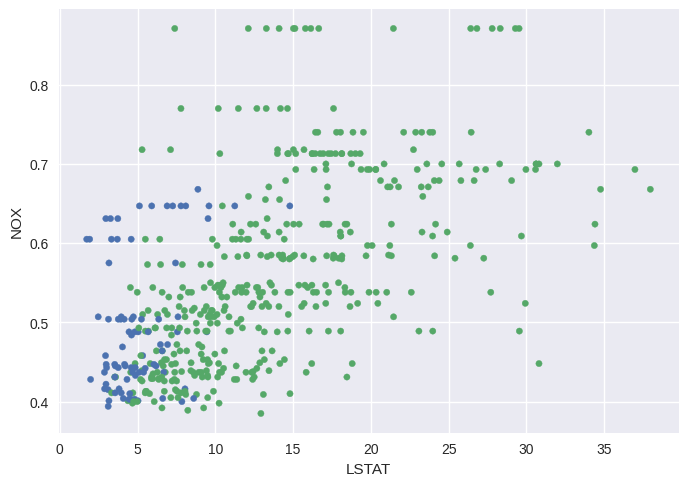

In [39]:
housing_df.plot.scatter(x='LSTAT', y='NOX', c=['C0' if c==1 else 'C1' for c in housing_df.CAT_MEDV])

<Axes: xlabel='LSTAT', ylabel='NOX'>

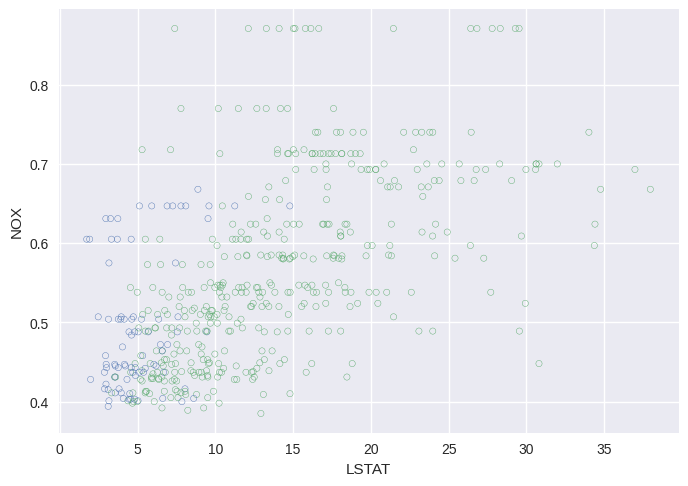

In [40]:
#NOX vs. LSTAT
# - Orange: low median value
# - blue: high median value

# Change the rendering of the points to open circles by controlling the color
housing_df.plot.scatter(x='LSTAT', y='NOX', color='none',
                        edgecolor=['C0' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])

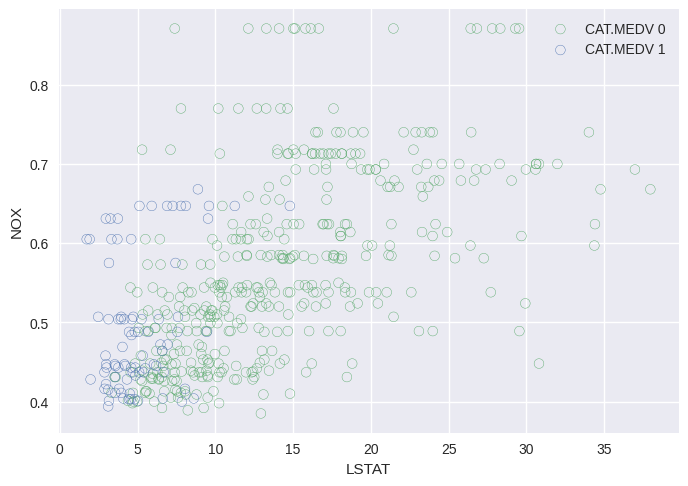

In [41]:
# Plot first the data points for CAT.MEDV of 0 and then of 1
_, ax = plt.subplots()
for catValue, color in (0, 'C1'), (1, 'C0'):
    subset_df = housing_df[housing_df.CAT_MEDV == catValue]
    ax.scatter(subset_df.LSTAT, subset_df.NOX, color='none', edgecolor=color)
ax.set_xlabel('LSTAT')
ax.set_ylabel('NOX')
ax.legend(["CAT.MEDV 0", "CAT.MEDV 1"])

plt.show()

In [42]:
fig = go.Figure()

for catValue, color in [(0, 'red'), (1, 'black')]:
    subset_df = housing_df[housing_df['CAT_MEDV'] == catValue]
    fig.add_trace(go.Scatter(
        x=subset_df['LSTAT'],
        y=subset_df['NOX'],
        mode='markers',
        marker=dict(color='white', line=dict(color=color, width=1)),
        name=f'CAT.MEDV {catValue}'
    ))

fig.update_layout(
    xaxis_title='LSTAT',
    yaxis_title='NOX',
    legend=dict(
        title='CAT.MEDV',
        traceorder="normal"
    )
)

fig.show()

Boston Housing - 3 Variable Bar Plot

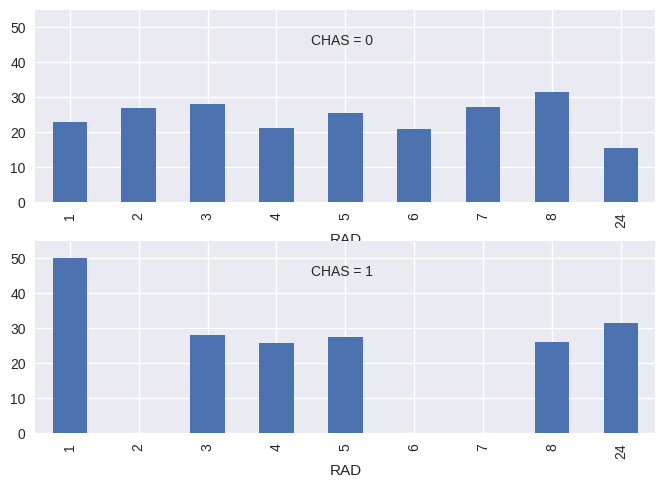

In [43]:
#MEDV (y-axis), CHAS and RAD

dataForPlot_df = housing_df.groupby(['CHAS','RAD']).mean()['MEDV']
# We determine all possible RAD values to use as ticks
ticks = set(housing_df.RAD)
for i in range(2):
    for t in ticks.difference(dataForPlot_df[i].index):
        dataForPlot_df.loc[(i, t)] = 0
# reorder to rows, so that the index is sorted
dataForPlot_df = dataForPlot_df[sorted(dataForPlot_df.index)]

# Determine a common range for the y axis
yRange = [0, max(dataForPlot_df) * 1.1]

fig, axes = plt.subplots(nrows=2, ncols=1)
dataForPlot_df[0].plot.bar(x='RAD', ax=axes[0], ylim=yRange)
dataForPlot_df[1].plot.bar(x='RAD', ax=axes[1], ylim=yRange)
axes[0].annotate('CHAS = 0', xy=(3.5, 45))
axes[1].annotate('CHAS = 1', xy=(3.5, 45))

plt.show()

## Boston Housing - Matrix Scatterplot

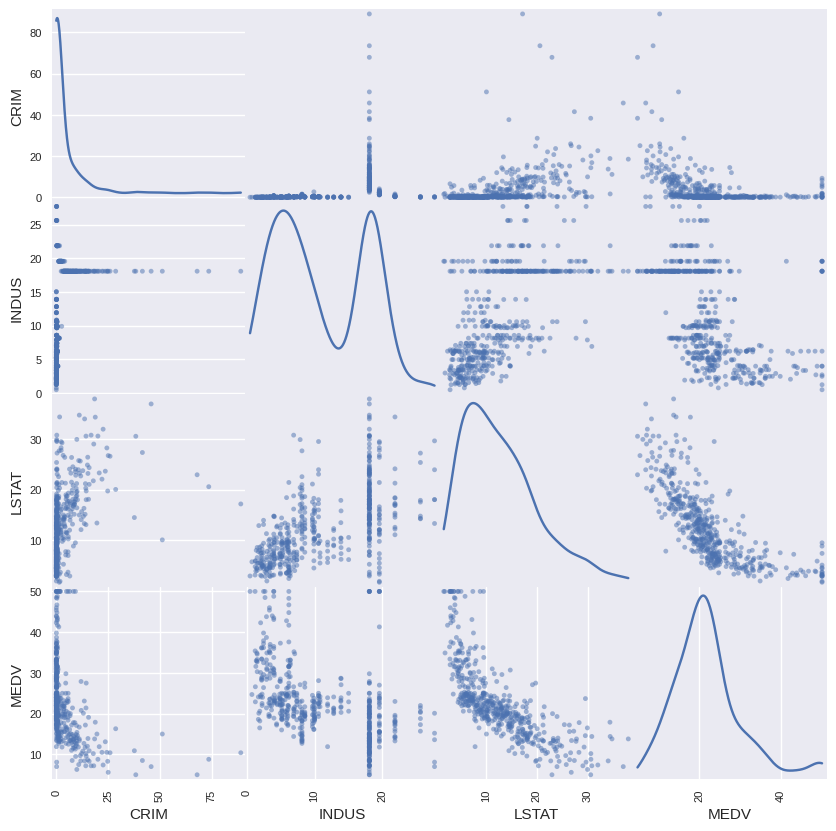

In [44]:

#Scatterplot matrix
matrix = scatter_matrix(housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']], figsize=(10, 10), diagonal='kde')

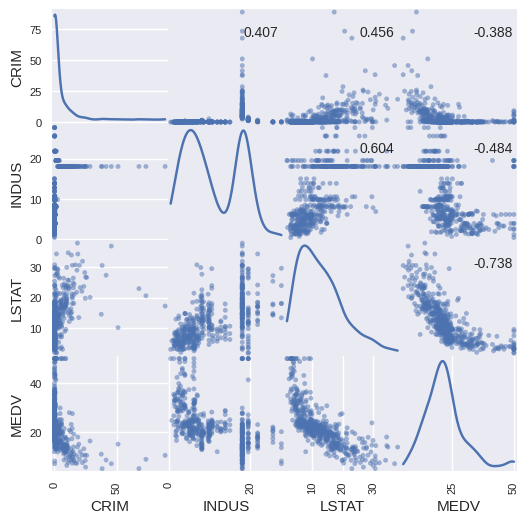

In [45]:
# Add the correlation coefficient to the scatterplots above the diagonal
df = housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']]
axes = scatter_matrix(df, alpha=0.5, figsize=(6, 6), diagonal='kde')
corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

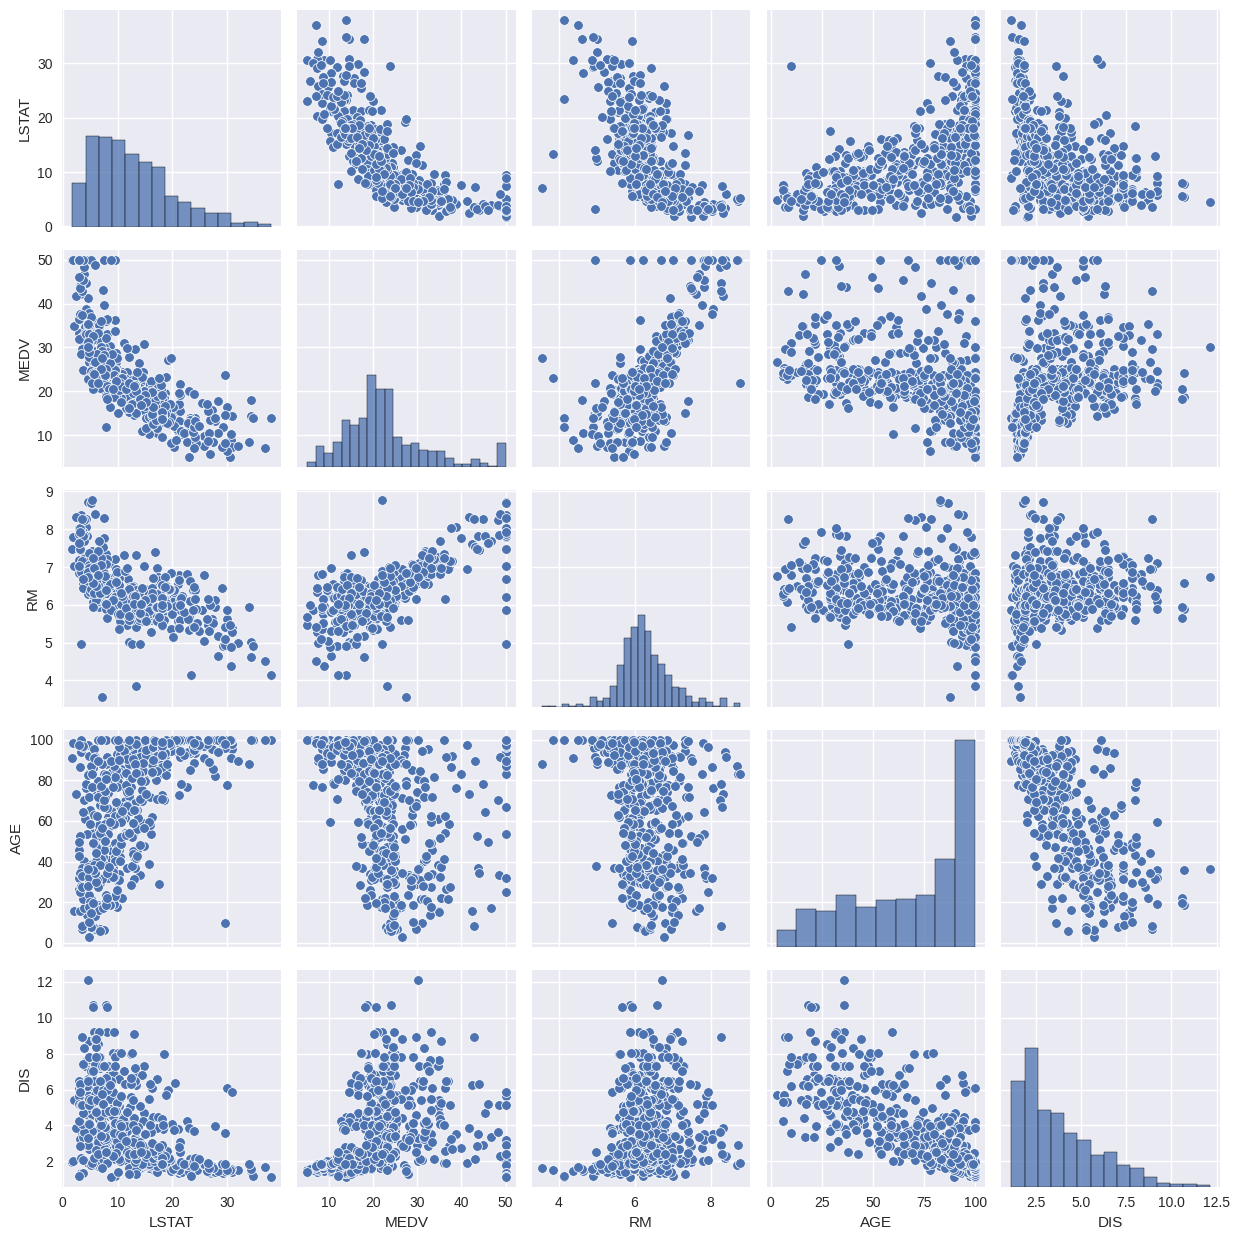

In [46]:
#Multiple Variable Analysis: Create a pair plot to visualize relationships between multiple variables

sns.pairplot(housing_df[['LSTAT', 'MEDV', 'RM', 'AGE', 'DIS']])
plt.tight_layout()
plt.show()

In [47]:
df = housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']]

# Create subplots with customized arrangement
fig = sp.make_subplots(rows=4, cols=4, subplot_titles=df.columns)

# Create scatter plots and add correlation coefficients
for i in range(4):
    for j in range(4):
        if i == j:
            # Add a diagonal plot (KDE or histogram)
            trace = go.Histogram(x=df.iloc[:, i], name=df.columns[i], histnorm='probability density')
            fig.add_trace(trace, row=i + 1, col=j + 1)
        else:
            # Add a scatter plot
            trace = go.Scatter(
                x=df.iloc[:, j],
                y=df.iloc[:, i],
                mode='markers',
                name=f'{df.columns[j]} vs {df.columns[i]}',
                marker=dict(
                    opacity=0.5,
                ),
            )
            fig.add_trace(trace, row=i + 1, col=j + 1)

            # Calculate and add correlation coefficient
            corr_coefficient = df.iloc[:, i].corr(df.iloc[:, j])
            fig.add_annotation(
                text=f'Corr: {corr_coefficient:.3f}',
                xref='paper',
                yref='paper',
                x=0.85,
                y=0.9,
                showarrow=False,
                font=dict(size=10),
            )

# Update the layout
fig.update_layout(
    title='Scatter Matrix with Correlation Coefficients',
    height=800,
    width=800,
)

fig.show()

## Boston Housing - Rescaling CRIM to Log Scale (uncrowd it)

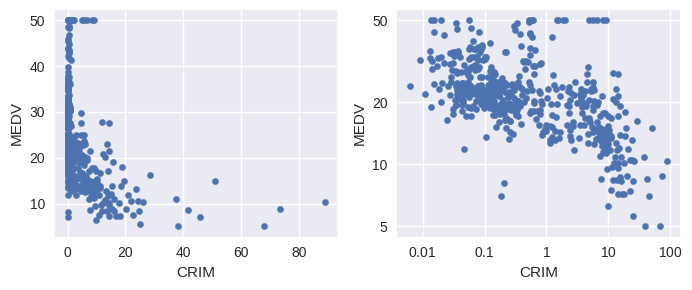

In [48]:
#fun fact: most of the time dealing with data is preprocessing
#variable transformation, derivation of new measures/variables etc.

# Avoid the use of scientific notation for the log axis
plt.rcParams['axes.formatter.min_exponent'] = 4

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# Regular scale
housing_df.plot.scatter(x='CRIM', y='MEDV', ax=axes[0])
# log scale
ax = housing_df.plot.scatter(x='CRIM', y='MEDV', logx=True, logy=True, ax=axes[1])
ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
plt.tight_layout()

plt.show()

In [49]:
#visualizing the data using a logarithmic scale instead of a linear scale
fig = px.scatter(housing_df, x='CRIM', y='MEDV', log_x=True, log_y=True, color_discrete_sequence=['red'])

fig.update_layout(
    xaxis=dict(
        type='log',
        exponentformat='none',  # Avoid scientific notation
    ),
    yaxis=dict(
        type='log',
        exponentformat='none',  # Avoid scientific notation
        tickvals=[5, 10, 20, 50],  # Set tick values
        ticktext=[5, 10, 20, 50],  # Set tick labels
    ),
    title='Scatter Plot with Log Scale Axes',
)

fig.show()

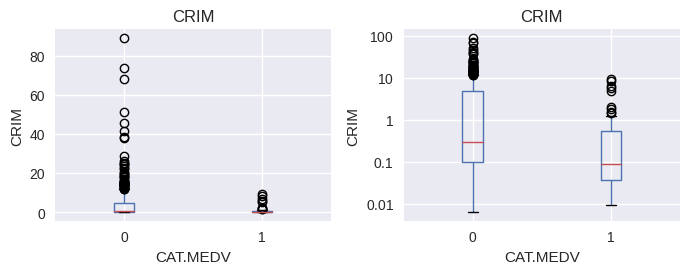

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# regular scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[0])
ax.set_xlabel('CAT.MEDV')
ax.set_ylabel('CRIM')

# log scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[1])
ax.set_xlabel('CAT.MEDV')
ax.set_ylabel('CRIM')
ax.set_yscale('log')

# suppress the title
axes[0].get_figure().suptitle('')
plt.tight_layout()

plt.show()

Regular Scale Boxplot (Left):

Key observations:
 - The median crime rate (horizontal line in the box) is higher for the lower value homes (CAT.MEDV = 0) compared to higher value homes (CAT.MEDV = 1).

- The box (interquartile range) for CAT.MEDV = 0 is much larger, indicating greater variability in crime rates for lower value homes.

- There are many outliers (points above the whiskers) for both categories, but especially for CAT.MEDV = 0.

- The distribution is highly skewed, with most of the data concentrated at lower crime rates, but with some extreme high values.


Limitations:
- The scale makes it difficult to see the details of the distribution, especially for lower crime rates and for CAT.MEDV = 1.


Logarithmic Scale Boxplot (Right):

Key observations:

- The log scale reveals much more detail about the distribution, especially for lower crime rates.

- The median crime rate is still clearly higher for CAT.MEDV = 0.

- The interquartile ranges (boxes) for both categories are more visible, showing a clear difference in the distribution of crime rates.

- Many data points appear as "outliers" (outside the whiskers) on this scale, especially for CAT.MEDV = 1.

- The distribution for CAT.MEDV = 1 (higher value homes) is more compressed, indicating less variability in crime rates for these areas.

Advantages of the log scale plot:
- It reveals the structure of the data at lower crime rates, which was obscured in the regular scale plot.
- It shows that what appeared to be a single line in the regular scale plot for CAT.MEDV = 1 is actually a distribution with its own variability.

## Amtrak - Fit, Zoom and Aggregate

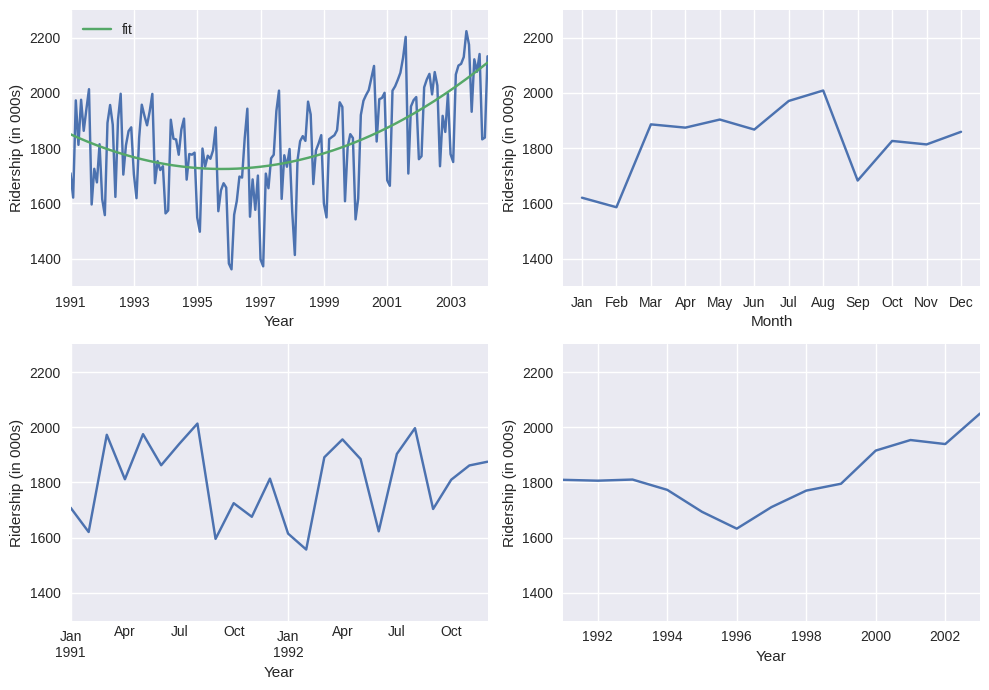

In [51]:


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))


amtrak_df = pd.read_csv(my_drive_path+ 'Amtrak.csv')
amtrak_df['Month'] = pd.to_datetime(amtrak_df.Month, format='%d/%m/%Y')
amtrak_df.set_index('Month', inplace=True)

# fit quadratic curve and display
quadraticFit = np.poly1d(np.polyfit(range(len(amtrak_df)), amtrak_df.Ridership, 2))
amtrak_fit = pd.DataFrame({'fit': [quadraticFit(t) for t in range(len(amtrak_df))]})
amtrak_fit.index = amtrak_df.index

ax = amtrak_df.plot(ylim=[1300, 2300], legend=False, ax=axes[0][0])
amtrak_fit.plot(ax=ax)
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

# Zoom in 2-year period 1/1/1991 to 12/1/1992
ridership_2yrs = amtrak_df.loc['1991-01-01':'1992-12-01']
ax = ridership_2yrs.plot(ylim=[1300, 2300], legend=False, ax=axes[1][0])
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

# Average by month
byMonth = amtrak_df.groupby(by=[amtrak_df.index.month]).mean()
ax = byMonth.plot(ylim=[1300, 2300], legend=False, ax=axes[0][1])
ax.set_xlabel('Month')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label
yticks = [-2.0,-1.75,-1.5,-1.25,-1.0,-0.75,-0.5,-0.25,0.0]
ax.set_xticks(range(1, 13))
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)]);

# Average by year (exclude data from 2004)
byYear = amtrak_df.loc['1991-01-01':'2003-12-01'].groupby(pd.Grouper(freq='A')).mean()
ax = byYear.plot(ylim=[1300, 2300], legend=False, ax=axes[1][1])
ax.set_xlabel('Year')  # set x-axis label
ax.set_ylabel('Ridership (in 000s)')  # set y-axis label

plt.tight_layout()

plt.show()

In [52]:
import plotly.subplots as sp
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import calendar

# Assuming 'amtrak_df' is your DataFrame
amtrak_df = pd.read_csv(my_drive_path + 'Amtrak.csv')
amtrak_df['Month'] = pd.to_datetime(amtrak_df.Month, format='%d/%m/%Y')
amtrak_df.set_index('Month', inplace=True)

# Create a quadratic fit
quadraticFit = np.poly1d(np.polyfit(range(len(amtrak_df)), amtrak_df.Ridership, 2))
amtrak_fit = pd.DataFrame({'fit': [quadraticFit(t) for t in range(len(amtrak_df))]})
amtrak_fit.index = amtrak_df.index

# Create subplots
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=[
    'Ridership vs. Year (Quadratic Fit)',
    'Ridership vs. Year (Zoomed In)',
    'Average Ridership by Month',
    'Average Ridership by Year (1991-2003)'
])

# Plot 1: Ridership vs. Year with Quadratic Fit
trace1 = go.Scatter(x=amtrak_df.index, y=amtrak_df.Ridership, mode='lines', name='Ridership')
trace2 = go.Scatter(x=amtrak_fit.index, y=amtrak_fit['fit'], mode='lines', name='Quadratic Fit')
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=1)
fig.update_xaxes(title_text='Year', row=1, col=1)
fig.update_yaxes(title_text='Ridership (in 000s)', row=1, col=1)

# Plot 2: Zoomed-in Ridership vs. Year
ridership_2yrs = amtrak_df.loc['1991-01-01':'1992-12-01']
trace3 = go.Scatter(x=ridership_2yrs.index, y=ridership_2yrs.Ridership, mode='lines', name='Ridership')
fig.add_trace(trace3, row=2, col=1)
fig.update_xaxes(title_text='Year', row=2, col=1)
fig.update_yaxes(title_text='Ridership (in 000s)', row=2, col=1)

# Plot 3: Average Ridership by Month
byMonth = amtrak_df.groupby(by=[amtrak_df.index.month]).mean()
trace4 = go.Scatter(x=byMonth.index, y=byMonth.Ridership, name='Average Ridership', marker_color='blue')
fig.add_trace(trace4, row=1, col=2)
fig.update_xaxes(title_text='Month', row=1, col=2, tickvals=list(range(1, 13)), ticktext=[calendar.month_abbr[i] for i in range(1, 13)])
fig.update_yaxes(title_text='Ridership (in 000s)', row=1, col=2)

# Plot 4: Average Ridership by Year (1991-2003) - you can easily convert to bar - just change Scatter to Bar
byYear = amtrak_df.loc['1991-01-01':'2003-12-01'].groupby(pd.Grouper(freq='A')).mean()
trace5 = go.Scatter(x=byYear.index, y=byYear.Ridership, name='Average Ridership', marker_color='green')
fig.add_trace(trace5, row=2, col=2)
fig.update_xaxes(title_text='Year', row=2, col=2)
fig.update_yaxes(title_text='Ridership (in 000s)', row=2, col=2)

# Update layout and title
fig.update_layout(title='Amtrak Ridership Analysis')
fig.update_layout(showlegend=False)  # Hide legends for individual subplots

fig.show()

Ridership vs. Year with Quadratic Fit:

- The overall trend shows an increase in ridership over time.

- The quadratic fit suggests that growth accelerated in later years.

- There are noticeable seasonal fluctuations throughout the time series.


Zoomed-in Ridership (1991-1992):

- This plot reveals clear seasonal patterns within each year.

- Ridership tends to peak in summer months and dip in winter months.

- There's a slight overall increase in ridership from 1991 to 1992.


Average Ridership by Month:

- Confirms strong seasonality in Amtrak ridership.

- Peak ridership occurs in July and August.

- Lowest ridership is in January and February.

- There's a gradual increase from winter to summer, then a sharper decline in fall.

Average Ridership by Year (1991-2003):

- Shows a general upward trend in average annual ridership.

- Some years show dips (e.g., around 1996-1997), possibly due to economic factors or service changes.

- The increase appears more pronounced in later years of this period.


Key Insights:

- Long-term Growth: Amtrak ridership has shown consistent growth over the years, with acceleration in later periods.

- Strong Seasonality: There's a clear seasonal pattern in ridership, with peaks in summer and troughs in winter. This likely reflects vacation travel patterns and possibly weather-related factors.

- Monthly Patterns: July and August are consistently the busiest months, while January and February are the slowest. This information could be crucial for capacity planning and scheduling.

- Year-to-Year Variations: While the overall trend is upward, there are
fluctuations from year to year. These could be related to economic conditions, changes in service offerings, or other external factors.

Potential for Further Analysis: The data suggests areas for deeper investigation, such as:

- Factors contributing to the accelerated growth in later years.

- Reasons for dips in certain years (e.g., 1996-1997).

- The impact of specific events or policy changes on ridership.

**The codes below we did not cover in class - reach out if you have any questions**

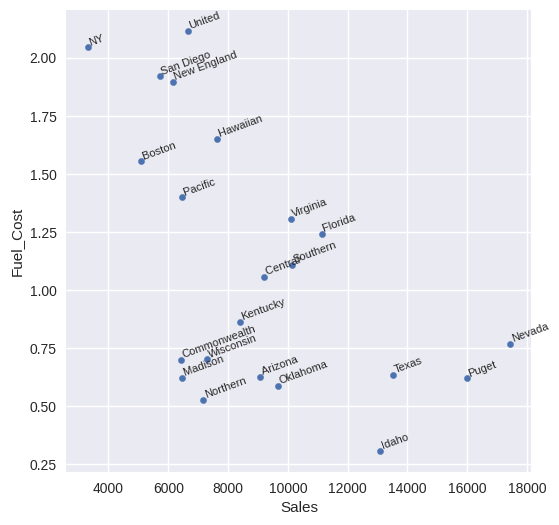

In [54]:

utilities_df = pd.read_csv(my_drive_path+ 'Utilities.csv')

ax = utilities_df.plot.scatter(x='Sales', y='Fuel_Cost', figsize=(6, 6))
points = utilities_df[['Sales','Fuel_Cost','Company']]
_ = points.apply(lambda x:
             ax.text(*x, rotation=20, horizontalalignment='left',
                     verticalalignment='bottom', fontsize=8), axis=1)

plt.show()

In [55]:
import plotly.express as px
import plotly.graph_objects as go

# Create the scatter plot
fig = px.scatter(utilities_df, x='Sales', y='Fuel_Cost',
                 hover_data=['Company'],
                 labels={'Sales': 'Sales', 'Fuel_Cost': 'Fuel Cost'},
                 title='Utility Companies: Sales vs Fuel Cost')

# Add company names as text
fig.add_trace(go.Scatter(
    x=utilities_df['Sales'],
    y=utilities_df['Fuel_Cost'],
    mode='text',
    text=utilities_df['Company'],
    textposition='top center',
    textfont=dict(size=8),
    showlegend=False
))


# Update layout for better readability
fig.update_layout(
    xaxis_title='Sales',
    yaxis_title='Fuel Cost',
    legend_title='Legend',
    font=dict(size=12)
)

fig.show()

## eBay Auctions for Swarovski Beads - Network Graph

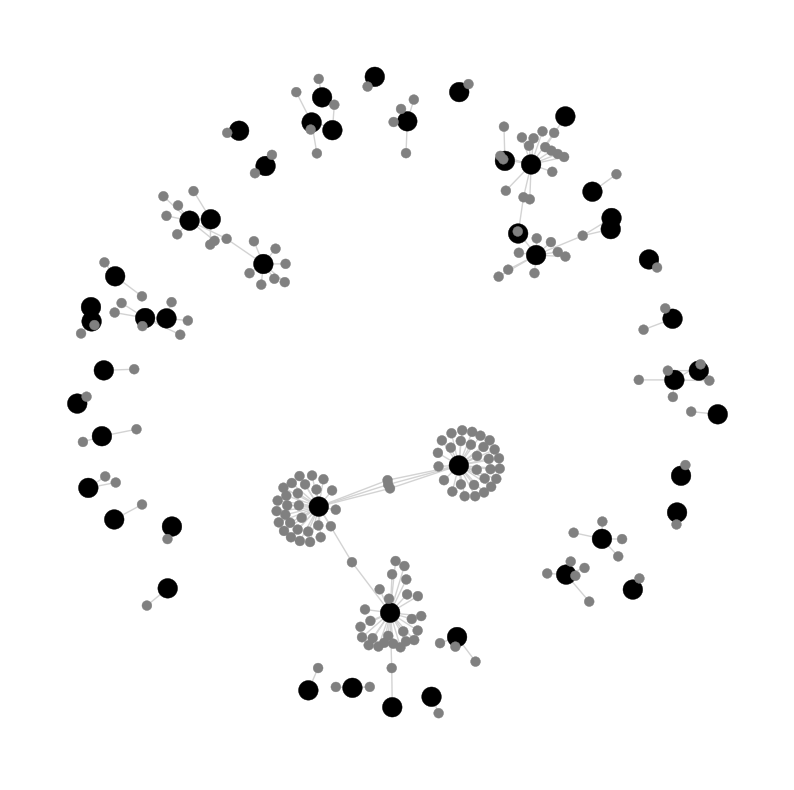

In [56]:
ebay_df = pd.read_csv(my_drive_path+'eBayNetwork.csv')

G = nx.from_pandas_edgelist(ebay_df, source='Seller', target='Bidder')

isBidder = [n in set(ebay_df.Bidder) for n in G.nodes()]
pos = nx.spring_layout(G, k=0.13, iterations=60, scale=0.5)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 edge_color='lightgray',
                 node_color=['gray' if bidder else 'black' for bidder in isBidder],
                 node_size=[50 if bidder else 200 for bidder in isBidder])
plt.axis('off')

plt.show()

In [57]:
import networkx as nx

# Assuming 'ebay_df' is your DataFrame
ebay_df = pd.read_csv(my_drive_path+'eBayNetwork.csv')

G = nx.from_pandas_edgelist(ebay_df, source='Seller', target='Bidder')

isBidder = [n in set(ebay_df.Bidder) for n in G.nodes()]
pos = nx.spring_layout(G, k=0.13, iterations=60, scale=0.5)

# Create a list of node colors and sizes based on whether the node is a bidder or not
node_colors = ['gray' if bidder else 'black' for bidder in isBidder]
node_sizes = [15 if bidder else 50 for bidder in isBidder]

# Create a Plotly figure for the network graph
fig = go.Figure()

# Add nodes
fig.add_trace(go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    mode='markers',
    marker=dict(
        color=node_colors,
        size=node_sizes,
        opacity=0.7,
    ),
    hoverinfo='text',
    text=list(G.nodes()),
))

# Add edges
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

fig.add_trace(go.Scatter(
    x=edge_x,
    y=edge_y,
    mode='lines',
    line=dict(color='lightgray', width=0.7),
    hoverinfo='none',
))

# Customize the layout
fig.update_layout(
    title='eBay Network Graph',
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
)

fig.show()

## Other Plots and Graphs

<Axes: xlabel='Income', ylabel='CCAvg'>

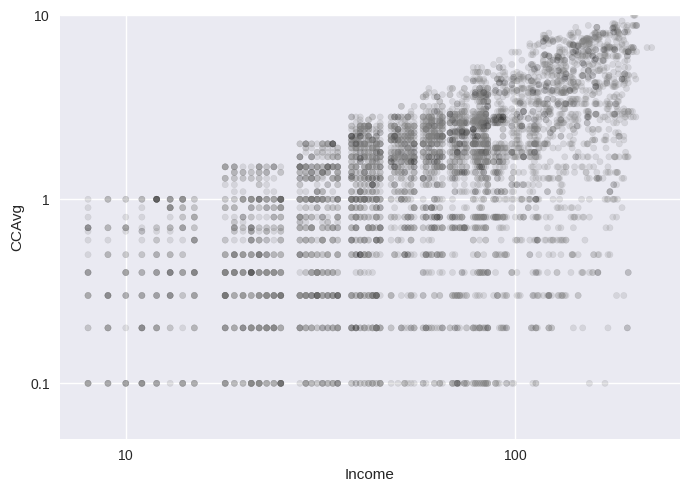

In [58]:
#typically used when the number of observations is large and scattering the data becomes ineffective
#sampling, reducing marker size, breaking down into subsets, aggregation can all be used to plot large amount of data


#Use alpha to add transparent colors
universal_df = pd.read_csv(my_drive_path+'UniversalBank.csv')

universal_df.plot.scatter(x='Income', y='CCAvg',
                          c=['black' if c == 1 else 'grey' for c in universal_df['Securities Account']],
                          ylim = (0.05, 10), alpha=0.2,
                          logx=True, logy=True)


<Axes: xlabel='Income', ylabel='CCAvg'>

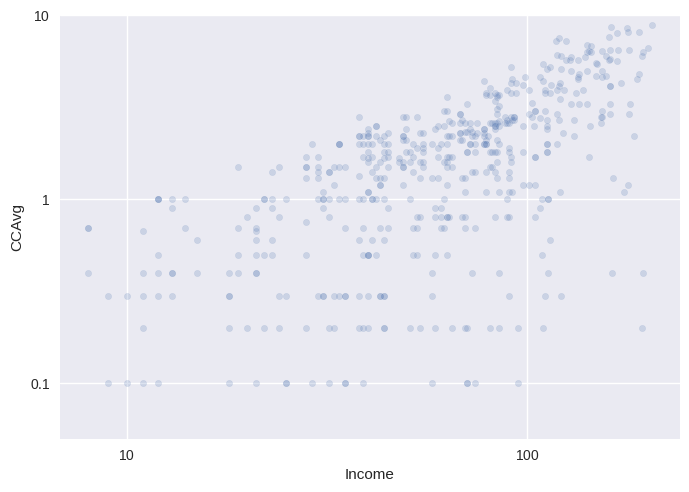

In [59]:
#filter data presentation becomes cleaner
universal_df = pd.read_csv(my_drive_path+'UniversalBank.csv')

universal_df[universal_df['Securities Account']==1].plot.scatter(x='Income', y='CCAvg',
                         # c=['black' if c == 1 else 'grey' for c in universal_df['Securities Account']],
                          ylim = (0.05, 10), alpha=0.2,
                          logx=True, logy=True)

<Axes: xlabel='Income', ylabel='CCAvg'>

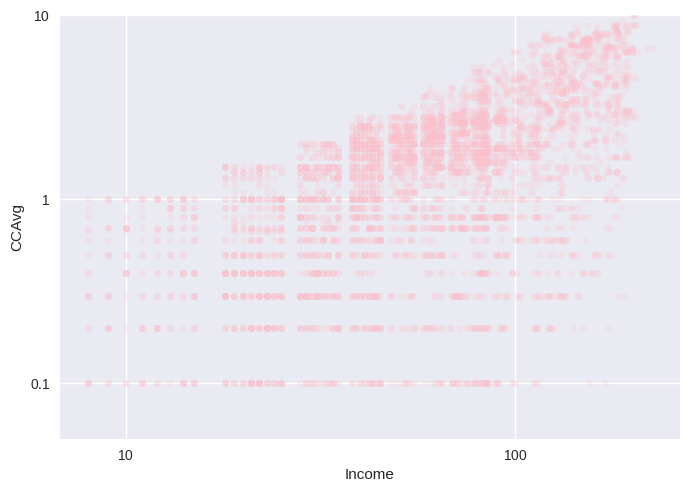

In [60]:
#Use alpha to add transparent colors
universal_df = pd.read_csv(my_drive_path+'UniversalBank.csv')

universal_df[universal_df['Securities Account']==0].plot.scatter(x='Income', y='CCAvg',
                          c='pink',
                          ylim = (0.05, 10), alpha=0.2,
                          logx=True, logy=True)

The pandas plot pandas has a number of problems that can be solved using matplotlib

- overlapping points: add random jitter to the datapoints
- distribution of securities account less obvious due to overplotting: separate plotting of the two sets of accounts

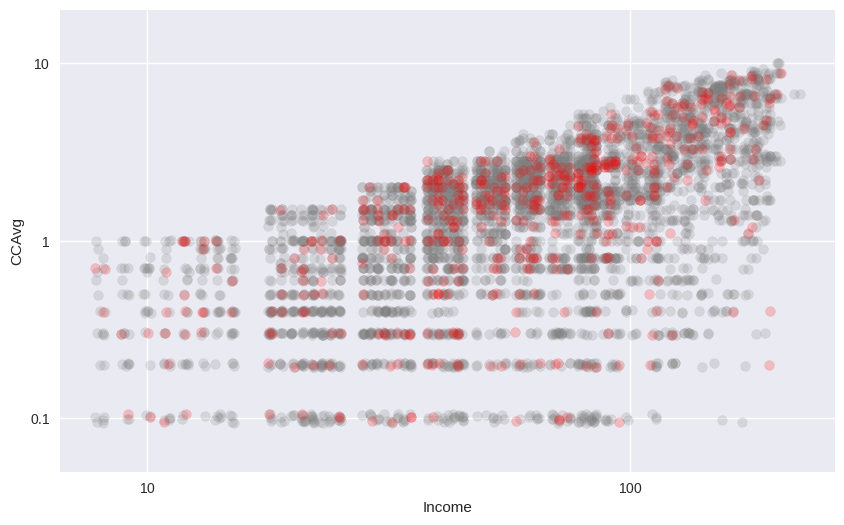

In [62]:
#or you can add jitter
def jitter(x, factor=1):
    """ Add random jitter to x values """
    sx = np.array(sorted(x))
    delta = sx[1:] - sx[:-1]
    minDelta = min(d for d in delta if d > 0)
    a = factor * minDelta / 5
    return x + np.random.uniform(-a, a, len(x))


saIdx = universal_df[universal_df['Securities Account'] == 1].index

plt.figure(figsize=(10,6))
plt.scatter(jitter(universal_df.drop(saIdx).Income),
            jitter(universal_df.drop(saIdx).CCAvg),
            marker='o', color='grey', alpha=0.2)
plt.scatter(jitter(universal_df.loc[saIdx].Income),
            jitter(universal_df.loc[saIdx].CCAvg),
            marker='o', color='red', alpha=0.2)
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.ylim((0.05, 20))
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")

plt.show()

       CRIM     ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.180  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.000  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.000  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.000  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.000  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   
5  0.000264  0.000  0.063050   0.0  0.150206  0.549722  0.574665  0.448545   
6  0.000921  0.125  0.271628   0.0  0.286008  0.469630  0.656025  0.402923   
7  0.001554  0.125  0.271628   0.0  0.286008  0.500287  0.959835  0.438387   
8  0.002303  0.125  0.271628   0.0  0.286008  0.396628  1.000000  0.450354   
9  0.001840  0.125  0.271628   0.0  0.286008  0.468097  0.854789  0.496731   

        RAD       TAX   PTRATIO     LSTAT      MEDV  CAT_MEDV  
0  0.000000  0.208015  0.287234  0.089680  0.422222       0.0  
1  0.043478  

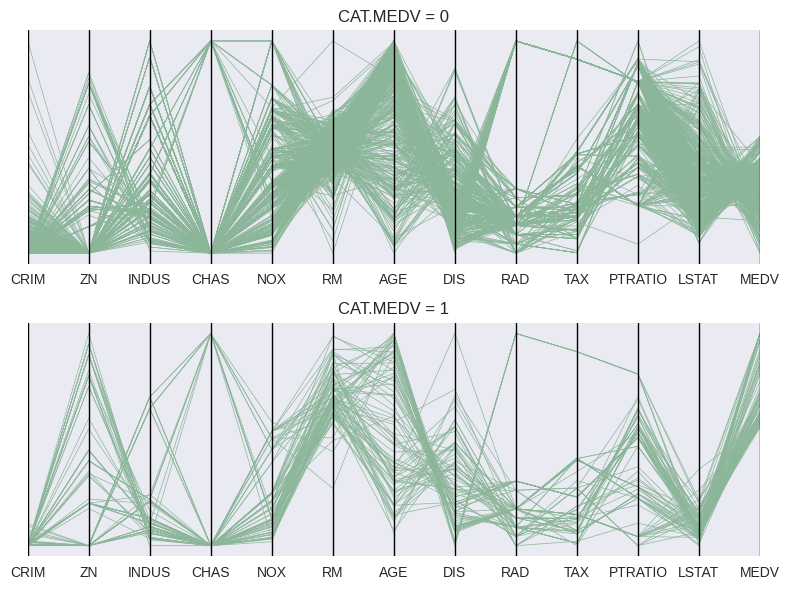

In [63]:
#multivariate plot
#multidimension information in a twoD plot using parallel coordinates
#1. draw a vertial axis for eac variable
#2. draw a line to connect the values in different axes



# Transform the axes, so that they all have the same range
min_max_scaler = preprocessing.MinMaxScaler()
dataToPlot = pd.DataFrame(min_max_scaler.fit_transform(housing_df),
                         columns=housing_df.columns)
print(dataToPlot.head(10))

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[8, 6])
for i in (0, 1):
    parallel_coordinates(dataToPlot.loc[dataToPlot.CAT_MEDV == i],
                         'CAT_MEDV', ax=axes[i], linewidth=0.5)
    axes[i].set_title('CAT.MEDV = {}'.format(i))
    axes[i].set_yticklabels([])
    axes[i].legend().set_visible(False)

plt.tight_layout()  # Increase the separation between the plots

plt.show()